# Udacity - Blog - Seattle AirBnB Data Analysis
_____________________________

## CRISP DM
* Business understanding – What does the business need?
* Data understanding – What data do we have / need? Is it clean?
* Data preparation – How do we organize the data for modeling?
* Modeling – What modeling techniques should we apply?
* Evaluation – Which model best meets the business objectives?
* Deployment – How do stakeholders access the results?

The following Airbnb activity is included in this Seattle dataset:

* Listings, including full descriptions and average review score
* Reviews, including unique id for each reviewer and detailed comments
* Calendar, including listing id and the price and availability for that day

### Business Understanding - AirBnb Seattle
1. For the Y2016, what are the available listing count by month? Which month has the most listing?
2. Which neigborhood has the most Airbnb's listing? Top 10?
3. Is there a positive relationship between the number of reviews and price?

### Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar as clndr
%matplotlib inline

# Load Seattle AirBnB data
listings = pd.read_csv("Seattle Airbnb Open Data/listings.csv")
calendar = pd.read_csv("Seattle Airbnb Open Data/calendar.csv")
reviews = pd.read_csv("Seattle Airbnb Open Data/reviews.csv")

# Get data size
print("listings: {}, calendar: {}, reviews: {}".format(listings.shape, calendar.shape, reviews.shape))

listings: (3818, 92), calendar: (1393570, 4), reviews: (84849, 6)


In [2]:
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [3]:
calendar.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [4]:
reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [5]:
# Understanding columns available and associated data
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [6]:
# Understand amount of missing data in listings for each columns (% of missing data = Mean x 100%)
listings.isnull().mean().sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [7]:
# Understanding columns available and associated data
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [8]:
# Understand % of missing data in calendar for each columns (% of missing data = Mean x 100%)
calendar.isnull().mean().sort_values(ascending=False)

price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

In [9]:
# Understanding columns available and associated data
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [10]:
# Understand % of missing data in calendar for each columns (% of missing data = Mean x 100%)
reviews.isnull().mean().sort_values(ascending=False)

comments         0.000212
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

### Data Preparation

In [18]:
# Define functions for cleaning/prepping
def prepare_listings(df):
    # convert price information to float
    currency_columns = "price weekly_price monthly_price security_deposit cleaning_fee".split()
    if df[currency_columns[0]].dtype != float:
        df[currency_columns] = df[currency_columns].apply(lambda x: x.str.replace('[$,]','')).astype(float)
        
    # only extract desired columns
    df = df[["id", "neighbourhood_cleansed", "price"]]
    
    return df

def prepare_calendar(df):
    # filter to extract only desired data
    df = df[calendar["available"] == "t"]
    
    # get month name from date string
    # df["date_month"] = df["date"].apply(lambda x: clndr.month_name[int(x.split("-")[1])])
    df["date_month"] = df["date"].apply(lambda x: x.split("-")[1])
    
    return df

# Clean/Prep
listings = prepare_listings(listings)
calendar = prepare_calendar(calendar)

### Data Modeling/Evaluation

In [19]:
listings.head(2)

,id,neighbourhood_cleansed,price
0,241032,West Queen Anne,85.0
1,953595,West Queen Anne,150.0


In [20]:
calendar.head(2)

,listing_id,date,available,price,date_month
0,241032,2016-01-04,t,$85.00,01
1,241032,2016-01-05,t,$85.00,01


In [26]:
listings["neighbourhood_cleansed"].value_counts()[:10]

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Name: neighbourhood_cleansed, dtype: int64

In [49]:
top_10_neighborhood = pd.DataFrame(listings["neighbourhood_cleansed"].value_counts().rename(key="Neighborhood")[:10])

In [50]:
top_10_neighborhood

,0
Broadway,397
Belltown,234
Wallingford,167
Fremont,158
Minor,135
University District,122
Stevens,119
First Hill,108
Central Business District,103
Lower Queen Anne,94


In [ ]:
def plot_features_importance(model, x_train, model_name):
    """Plot features importances from a model
    """
    

    # Getting feature importances from the model
    col_heads = [top_10_neighborhood, "score"]
    values = sorted(zip(x_train.columns, model.feature_importances_), key=lambda x: x[1] * -1)
    forest_feature_importances = pd.DataFrame(values, columns = col_heads)
    forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

    # Pllotting top 10 features as per feature importance
    features = forest_feature_importances['name'][:10]
    y_pos = np.arange(len(features))
    scores = forest_feature_importances['score'][:10]

    plt.figure(figsize=(10,5))
    plt.bar(y_pos, scores, align='center', alpha=0.5)
    plt.xticks(y_pos, features, rotation='vertical')
    plt.ylabel('Score')
    plt.xlabel('Features')
    plt.title('Feature importances ('+model_name+')')

    plt.show()

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

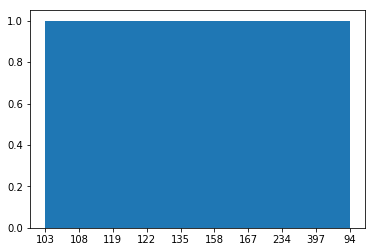

In [38]:
plt.hist(top_10_neighborhood.keys)

TypeError: set_xticklabels() missing 1 required positional argument: 'labels'

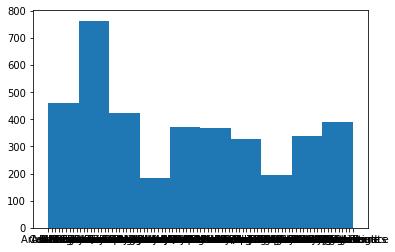

In [23]:
fig, ax = plt.subplots(1, 1)
lololol = ax.hist(listings.neighbourhood_cleansed)
ax.set_xticklabels(rotation=45)
plt.show()


In [15]:
calendar.groupby("date_month")["listing_id"].count()

date_month
April        76037
August       76347
December     87061
February     73321
January      64937
July         74222
June         77244
March        83938
May          79971
November     81780
October      82438
September    77246
Name: listing_id, dtype: int64

(array([76037., 76347., 87061., 73321., 64937., 74222., 77244., 83938.,
        79971., 81780., 82438., 77246.]),
 array([ 0.        ,  0.91666667,  1.83333333,  2.75      ,  3.66666667,
         4.58333333,  5.5       ,  6.41666667,  7.33333333,  8.25      ,
         9.16666667, 10.08333333, 11.        ]),
 <a list of 12 Patch objects>)

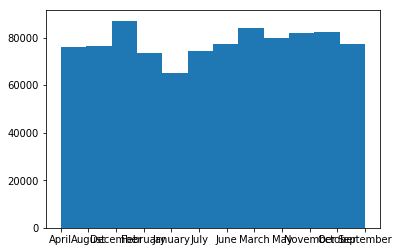

In [16]:
plt.hist(calendar["date_month"], bins = 12)

In [17]:

def plot_hist(df, col):
    """
    Provided dataframe and desired column info, plot histogram
    
    """
    import calendar

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.set_title('Average price by month in ' + cityname, 
                 fontsize=15)
    ax.set_xlabel('Months')
    ax.set_ylabel('Price($)')
    
    g = sns.lineplot(x="month", y="price",
                data=df, markers=True)

    ticks = g.axes.get_xticks()
    # Convert months to their abbreviate name name
    xlabels = [calendar.month_abbr[int(x)] if (x > 0 and x <=12) 
               else 0  for x in ticks]
    g.set(xlabel='Months', ylabel='Price ($)')
    
    g = g.set_xticklabels(xlabels)
    plt.show()